In [1]:
import pandas as pd
import numpy as np
import models

# Read in and Pre-process Data

In [2]:
data = pd.read_csv('data/hips_proms_data.csv', low_memory=False)

eqvas = 'Pre-Op Q EQ VAS'
diabetes = 'Diabetes'
athritus = 'Arthritis'
comorbidities = [
    'Heart Disease',
    'High Bp',
    'Stroke',
    'Circulation',
    'Lung Disease',
    'Diabetes',
    'Kidney Disease',
    'Nervous System',
    'Liver Disease',
    'Cancer',
    'Depression',
    'Arthritis'
]
postq = 'Hip Replacement Post-Op Q Score'
preq = 'Hip Replacement Pre-Op Q Score'
ncomobs = 'Number of Comorbidities'
data[comorbidities] = data[comorbidities].replace(to_replace=[9], value=0)
data[eqvas] = data[eqvas].replace(to_replace=[999], value=np.nan)
data[ncomobs] = data[comorbidities].sum(axis=1)
data['Gain'] = data[postq] - data[preq]
gain_means = data.groupby(preq)['Gain'].mean().values
data = data[[eqvas] + comorbidities + [ncomobs, preq, postq, 'Gain']]

# Define some prioritisation strategies

In [3]:
data['Priority_none'] = 0

In [4]:
data['Priority_comorbidities'] = (data['Number of Comorbidities'].max() - data['Number of Comorbidities'])

In [5]:
data['Priority_diabetes'] = (data['Diabetes'].max() - data['Diabetes'])

In [6]:
data['Priority_arthritis'] = (data['Arthritis'].max() - data['Arthritis'])

# Run models

In [7]:
recs_none = models.build_and_run_simulation(
    data=data,
    priority_column='Priority_none',
    referrals_per_day=9.999,
    interventions_per_day=10,
    n_years=10,
    warmup=3,
    cooldown=1,
    observation_period=0.25
)

100%|███████████████████████████████████| 5110.0/5110 [00:07<00:00, 694.27it/s]


In [8]:
recs_comorbidities = models.build_and_run_simulation(
    data=data,
    priority_column='Priority_comorbidities',
    referrals_per_day=9.999,
    interventions_per_day=10,
    n_years=10,
    warmup=3,
    cooldown=1,
    observation_period=0.25
)

100%|███████████████████████████████████| 5110.0/5110 [00:07<00:00, 656.60it/s]


In [9]:
recs_diabetes = models.build_and_run_simulation(
    data=data,
    priority_column='Priority_diabetes',
    referrals_per_day=9.999,
    interventions_per_day=10,
    n_years=10,
    warmup=3,
    cooldown=1,
    observation_period=0.25
)

100%|███████████████████████████████████| 5110.0/5110 [00:07<00:00, 671.46it/s]


In [10]:
recs_arthritis = models.build_and_run_simulation(
    data=data,
    priority_column='Priority_arthritis',
    referrals_per_day=9.999,
    interventions_per_day=10,
    n_years=10,
    warmup=3,
    cooldown=1,
    observation_period=0.25
)

100%|███████████████████████████████████| 5110.0/5110 [00:07<00:00, 682.73it/s]


In [11]:
list_of_recs = [recs_none, recs_comorbidities, recs_arthritis, recs_diabetes]
names = ['First Come First Served', 'Co-morbidities', 'Arthritis', 'Diabetes']

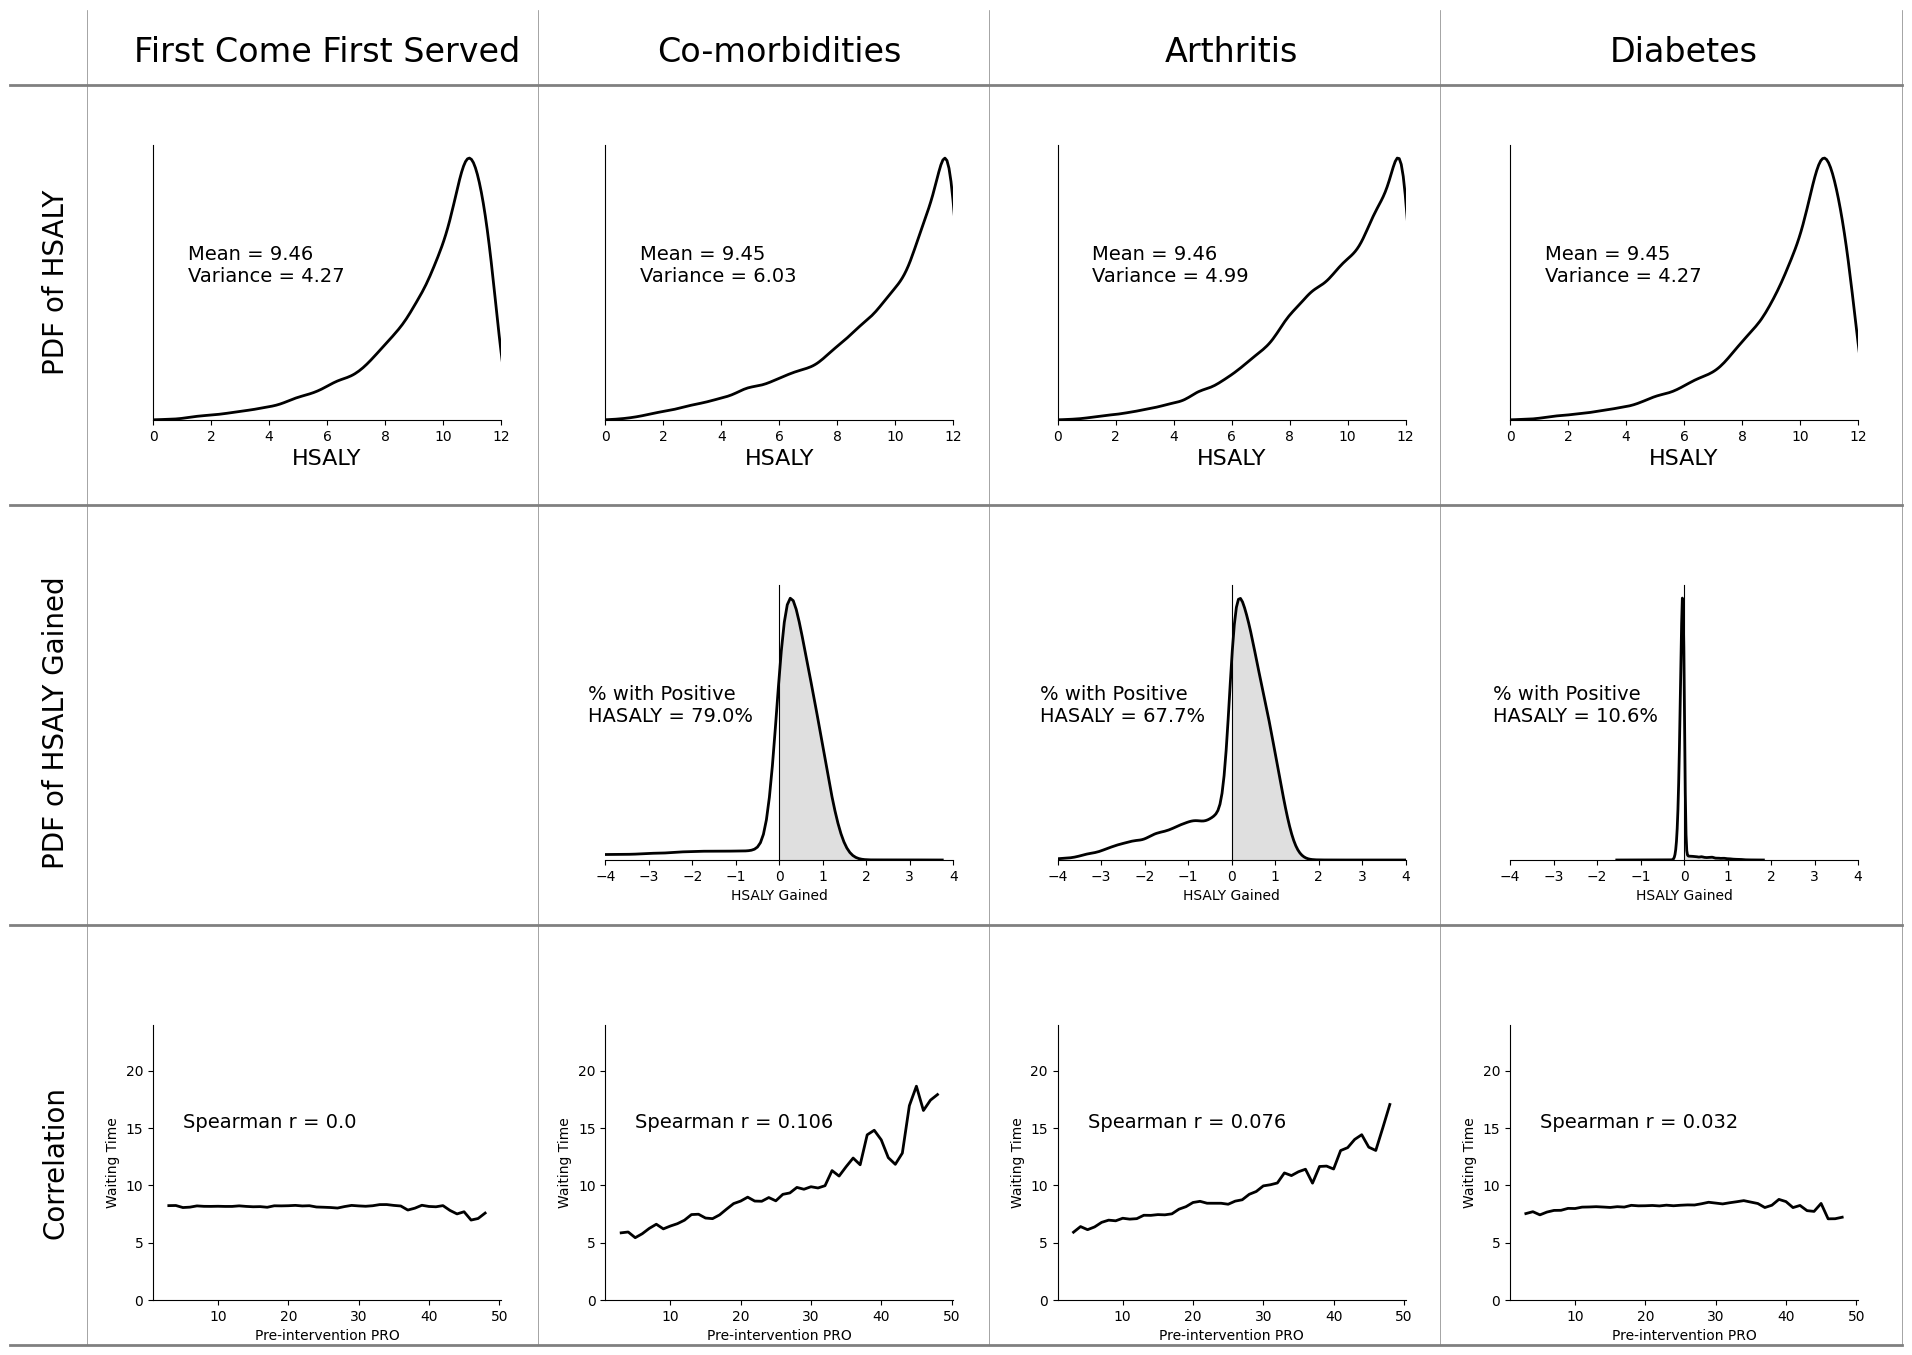

In [12]:
results_fig = models.plot_results(
    list_of_recs=list_of_recs,
    names=names,
    baseline='First Come First Served'
);
results_fig.savefig('results.pdf')